# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import sys

In [2]:
sys.path.append('D:\Machine Learning\Ironhack\GitHub\IronEnrique')

In [3]:
from Modules.Transforms import my_transformations
from Modules.Performance import perf_classification

# Functions

In [4]:
# Function to store in dictionary the number of nan values per column

def nan_counter(df):
    
    """
    Returns a dictionary containing the number of nan values per column (for dataframe df)

    Parameters
    ----------
    df : Pandas dataframe

    Returns
    -------
    remaining_nan : Dictionary
        Contains the number of nan values in each column of the dataframe

    """
    
    remaining_nan = {}

    for column in df.columns:

        remaining_nan[column] = df[column][df[column].isna() == True].size

    return remaining_nan

# Loading the data

In [5]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

# Checking the Data

In [6]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [7]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [8]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors="coerce")

In [9]:
churnData = pd.concat([churnData._get_numeric_data(), churnData.select_dtypes("object").astype("category")], axis=1)

In [10]:
# churnData.loc[:,"SeniorCitizen"] = churnData.loc[:,"SeniorCitizen"].astype("category")

In [11]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7043 non-null   int64   
 1   tenure            7043 non-null   int64   
 2   MonthlyCharges    7043 non-null   float64 
 3   TotalCharges      7032 non-null   float64 
 4   gender            7043 non-null   category
 5   Partner           7043 non-null   category
 6   Dependents        7043 non-null   category
 7   PhoneService      7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  Churn             7043 non-null   category
dtypes: category(12), float64

In [12]:
nan_counter(churnData)

{'SeniorCitizen': 0,
 'tenure': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'gender': 0,
 'Partner': 0,
 'Dependents': 0,
 'PhoneService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'Churn': 0}

In [13]:
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(np.mean(churnData["TotalCharges"]))

In [14]:
nan_counter(churnData)

{'SeniorCitizen': 0,
 'tenure': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 0,
 'gender': 0,
 'Partner': 0,
 'Dependents': 0,
 'PhoneService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'Churn': 0}

In [15]:
churnData["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [16]:
ord_dict = {"Contract": ["Month-to-month", "One year", "Two year"]}

# Logistic Regression

In [17]:
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [18]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler="standard", categorical=True)
train = transformed["train"]
test = transformed["test"]

In [19]:
train[1]

""
0
1
2
3
4
...
5629
5630
5631
5632


In [20]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [21]:
x_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1.612532,-0.439763,0.674154,1.704560
1,-0.747907,2.273954,-0.614894,-0.711711
2,1.571835,-0.439763,-1.335097,-0.210251
3,0.025340,-0.439763,0.301578,0.051750
4,0.595101,-0.439763,1.128231,0.989863
...,...,...,...,...
5629,-0.707210,-0.439763,1.284580,-0.329573
5630,-0.910696,-0.439763,0.873748,-0.583178
5631,1.042771,-0.439763,-1.466497,-0.485517
5632,-1.276971,2.273954,0.163525,-0.977436


In [22]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred_train = pd.DataFrame(model.predict(x_train))
y_pred_test = pd.DataFrame(model.predict(x_test))

Confusion matrix for the train set
-----------------


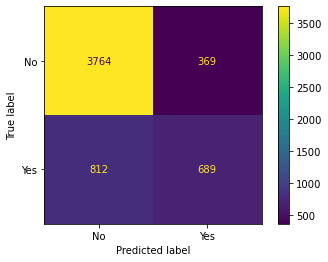

Confusion matrix for the test set
-----------------


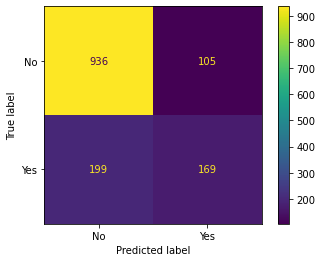

In [24]:
performance_log = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=True)

In [25]:
display(performance_log["performance"])

,Train,Test
Error_metric,,
Accuracy,0.790380,0.784244
Precision,0.651229,0.616788
Recall,0.459027,0.459239


# Decision Tree Classifier - default arguments

In [26]:
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [27]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [28]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [29]:
x_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,72,0,85.10,6155.40
1,14,1,46.35,672.70
2,71,0,24.70,1810.55
3,33,0,73.90,2405.05
4,47,0,98.75,4533.70
...,...,...,...,...
5629,15,0,103.45,1539.80
5630,10,0,91.10,964.35
5631,58,0,20.75,1185.95
5632,1,1,69.75,69.75


In [30]:
model_tree_default = DecisionTreeClassifier(random_state=0)
model_tree_default.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_pred_train = model_tree_default.predict(x_train)
y_pred_test  = model_tree_default.predict(x_test)

Confusion matrix for the train set
-----------------


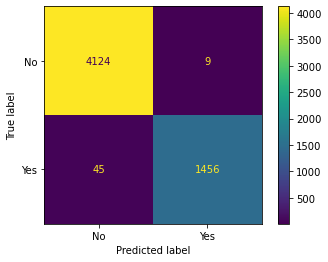

Confusion matrix for the test set
-----------------


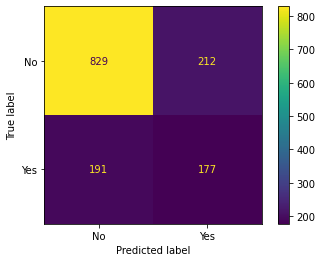

In [32]:
performance_tree_default = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=True)

In [33]:
display(performance_tree_default["performance"])

,Train,Test
Error_metric,,
Accuracy,0.990415,0.713982
Precision,0.993857,0.455013
Recall,0.970020,0.480978


The model is overfitting, too much complexity

# Decision Tree Classifier - playing with the arguments

In [34]:

for n in range(2, 10):
    
    
    model = DecisionTreeClassifier(max_depth=n)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    performance_tree = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
    index = [[f'depth={n}', f'depth={n}'],["Train", "Test"]]
    performance_tree["performance"].columns = index
    
    if n == 2:
        
        results_df = performance_tree["performance"]
        
    else:
        
        results_df = pd.concat([results_df, performance_tree["performance"]], axis=1)


In [35]:
results_df

depth=2             depth=3             depth=4            \
                 Train      Test     Train      Test     Train      Test   
Error_metric                                                               
Accuracy      0.786830  0.775018  0.786830  0.775018  0.791977  0.778566   
Precision     0.661290  0.613333  0.661290  0.613333  0.672251  0.616667   
Recall        0.409727  0.375000  0.409727  0.375000  0.427715  0.402174   

               depth=5             depth=6             depth=7            \
                 Train      Test     Train      Test     Train      Test   
Error_metric                                                               
Accuracy      0.801562  0.776437  0.806532  0.770759  0.818069  0.770050   
Precision     0.679139  0.598513  0.675491  0.575251  0.709507  0.574830   
Recall        0.483678  0.437500  0.526982  0.467391  0.536975  0.459239   

               depth=8             depth=9            
                 Train      Test     Train      Test  
Error_metric                                          
Accuracy      0.830316  0.760823  0.843273  0.762952  
Precision     0.714736  0.547692  0.769634  0.560714  
Recall        0.604264  0.483696  0.587608  0.426630

In [36]:
depth = 3
model_tree_maxdepth = DecisionTreeClassifier(max_depth=depth)
model_tree_maxdepth.fit(x_train, y_train)
y_pred_train = model_tree_maxdepth.predict(x_train)
y_pred_test = model_tree_maxdepth.predict(x_test)
performance_tree_maxdepth = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
display(performance_tree_maxdepth["performance"])

,Train,Test
Error_metric,,
Accuracy,0.786830,0.775018
Precision,0.661290,0.613333
Recall,0.409727,0.375000


In [37]:
x_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,72,0,85.10,6155.40
1,14,1,46.35,672.70
2,71,0,24.70,1810.55
3,33,0,73.90,2405.05
4,47,0,98.75,4533.70
...,...,...,...,...
5629,15,0,103.45,1539.80
5630,10,0,91.10,964.35
5631,58,0,20.75,1185.95
5632,1,1,69.75,69.75


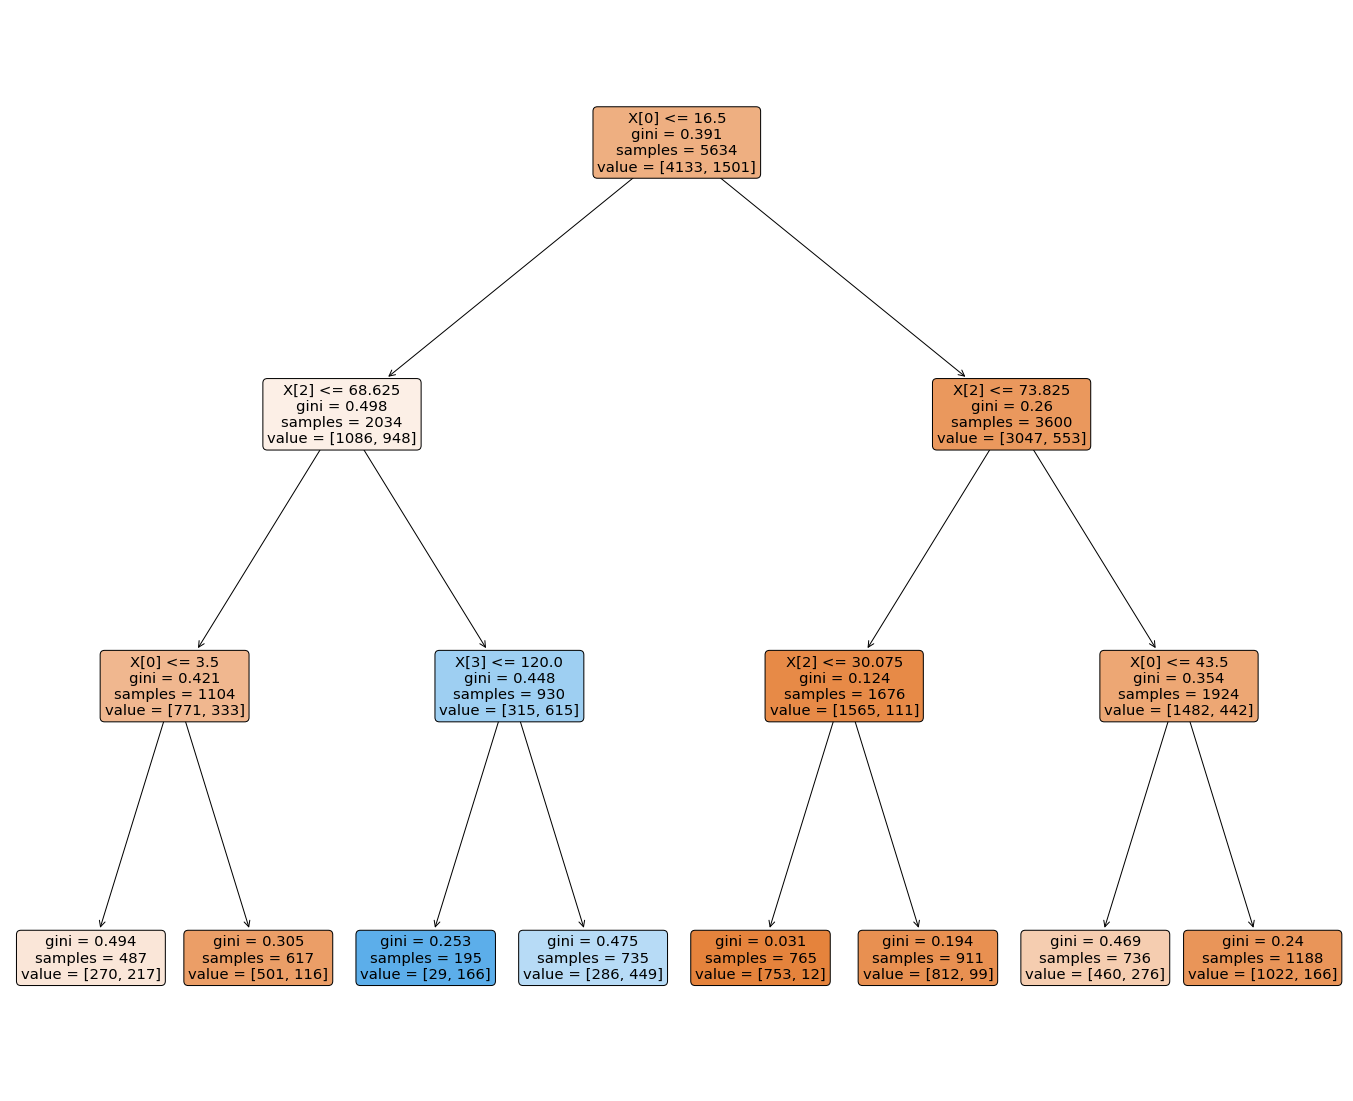

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,20))

plot_tree(model_tree_maxdepth, filled = True, rounded=True)
plt.show() 

In [39]:
min_samples = 500
model_tree_minsamples = DecisionTreeClassifier(min_samples_leaf = min_samples)
model_tree_minsamples.fit(x_train, y_train)
y_pred_train = model_tree_minsamples.predict(x_train)
y_pred_test = model_tree_minsamples.predict(x_test)
performance_tree_minsamples = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
display(performance_tree_minsamples["performance"])

,Train,Test
Error_metric,,
Accuracy,0.786830,0.775018
Precision,0.661290,0.613333
Recall,0.409727,0.375000


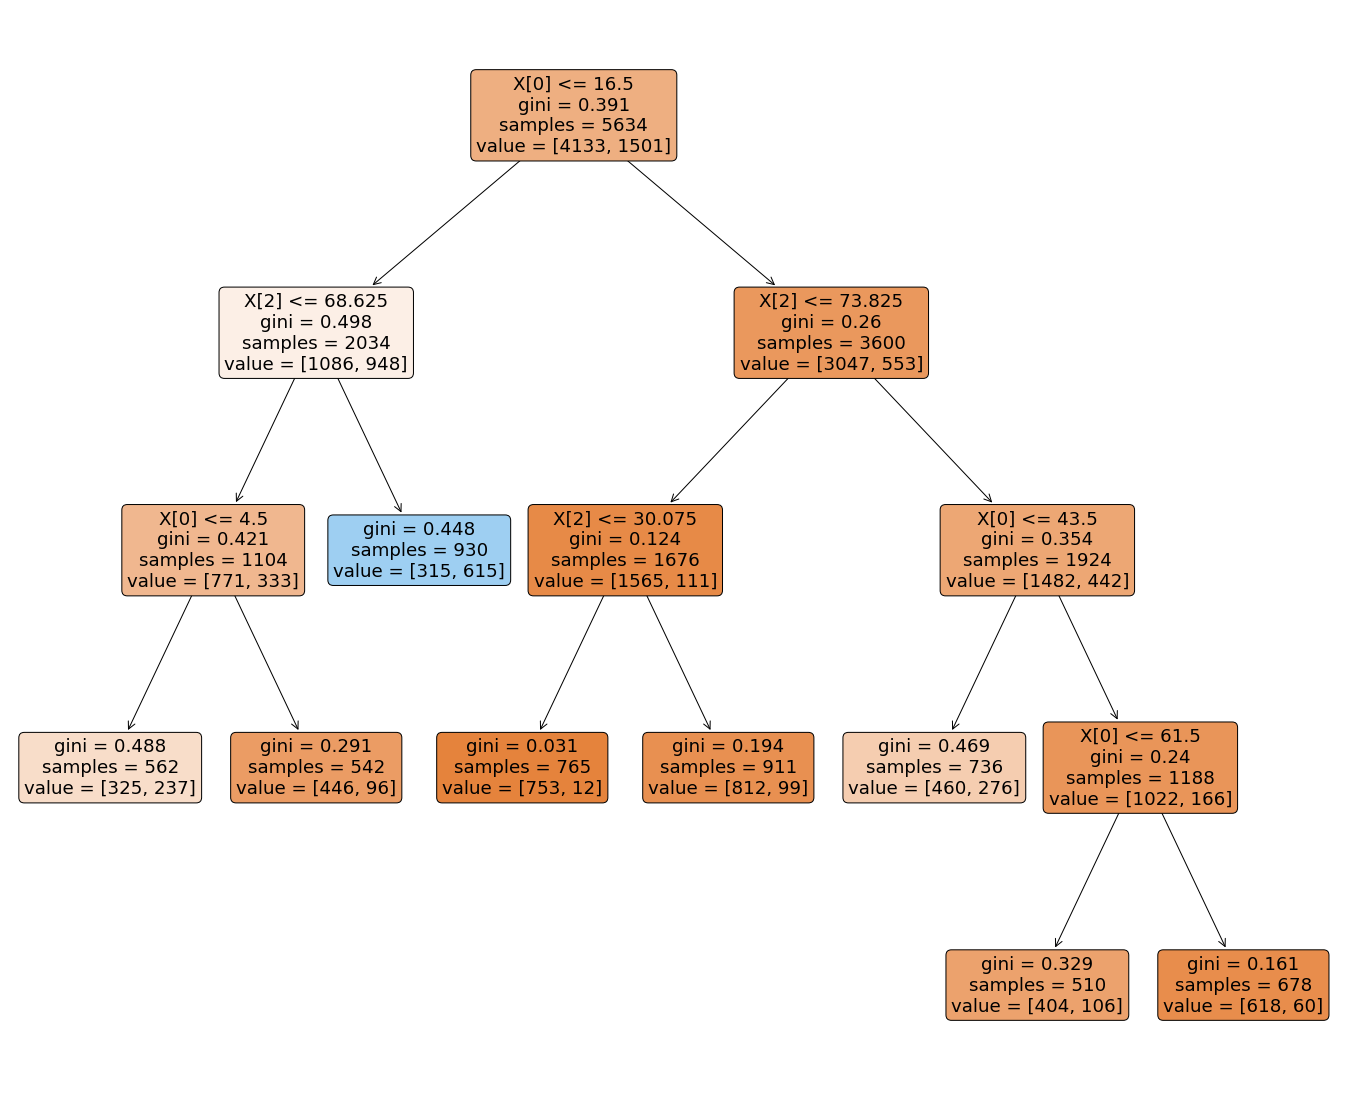

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,20))

plot_tree(model_tree_minsamples, filled = True, rounded=True)
plt.show() 

# Decision Tree Classifier - all variables

In [41]:
y = churnData["Churn"]
x = churnData.drop("Churn", axis=1)

In [42]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,0,1,29.85,29.85,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,0,34,56.95,1889.50,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,0,2,53.85,108.15,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,0,45,42.30,1840.75,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,0,2,70.70,151.65,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,0,72,103.20,7362.90,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,0,11,29.60,346.45,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,1,4,74.40,306.60,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [43]:
ord_dict = {"gender": ["Female", "Male"], "Partner": ["No", "Yes"], "Dependents": ["No", "Yes"], "PhoneService": ["No", "Yes"]
            , "Contract": ["Month-to-month", "One year", "Two year"]
            }

nom_list = ["TechSupport", "StreamingTV", "StreamingMovies", "DeviceProtection", "OnlineBackup", "OnlineSecurity"] 

In [44]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True, ordinal_dict=ord_dict, nominal_list=nom_list)
train = transformed["train"]
test = transformed["test"]

C:\Users\ehern\miniconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
C:\Users\ehern\miniconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [45]:
train = transformed["train"]
test = transformed["test"]

In [46]:
train[2]

,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,1,0,1,0,1,0,1,0,1,0,1
1,0,0,0,1,0,1,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,1,0,1,0,1,0,1,0,0,0,0
5630,0,1,0,1,0,0,0,1,0,0,0,0
5631,1,0,1,0,1,0,1,0,1,0,1,0
5632,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
x_train = pd.concat([train[0], train[1], train[2]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1], test[2]], axis=1)
y_test = test[3]

In [48]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,Contract,TechSupport_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,72,85.10,6155.40,0.0,1.0,0.0,1.0,2.0,0,...,0,1,0,1,0,1,0,1,0,1
1,1,14,46.35,672.70,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,71,24.70,1810.55,0.0,1.0,1.0,1.0,2.0,1,...,1,0,1,0,1,0,1,0,1,0
3,0,33,73.90,2405.05,1.0,1.0,1.0,1.0,1.0,0,...,0,1,0,1,0,1,0,0,0,0
4,0,47,98.75,4533.70,0.0,1.0,0.0,1.0,0.0,0,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,15,103.45,1539.80,1.0,1.0,0.0,1.0,0.0,0,...,0,1,0,1,0,1,0,0,0,0
5630,0,10,91.10,964.35,0.0,0.0,1.0,1.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
5631,0,58,20.75,1185.95,1.0,1.0,0.0,1.0,2.0,1,...,1,0,1,0,1,0,1,0,1,0
5632,1,1,69.75,69.75,1.0,0.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


Confusion matrix for the train set
-----------------


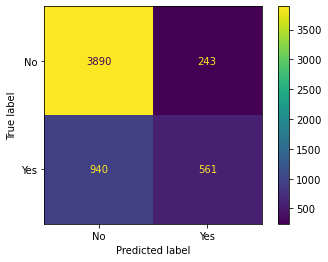

Confusion matrix for the test set
-----------------


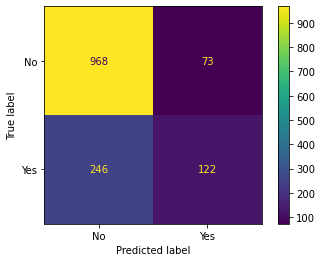

,Train,Test
Error_metric,,
Accuracy,0.790025,0.773598
Precision,0.697761,0.625641
Recall,0.373751,0.331522


In [49]:
model_allvars = DecisionTreeClassifier(max_depth=3)
model_allvars.fit(x_train, y_train)
y_pred_train = model_allvars.predict(x_train)
y_pred_test = model_allvars.predict(x_test)
performance_tree_allvars = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=True)
display(performance_tree_allvars["performance"])

In [50]:
x_train["Contract"]

0       2.0
1       0.0
2       2.0
3       1.0
4       0.0
       ... 
5629    0.0
5630    0.0
5631    2.0
5632    0.0
5633    0.0
Name: Contract, Length: 5634, dtype: float64

In [51]:
x_train.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'Contract',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes'],
      dtype='object')

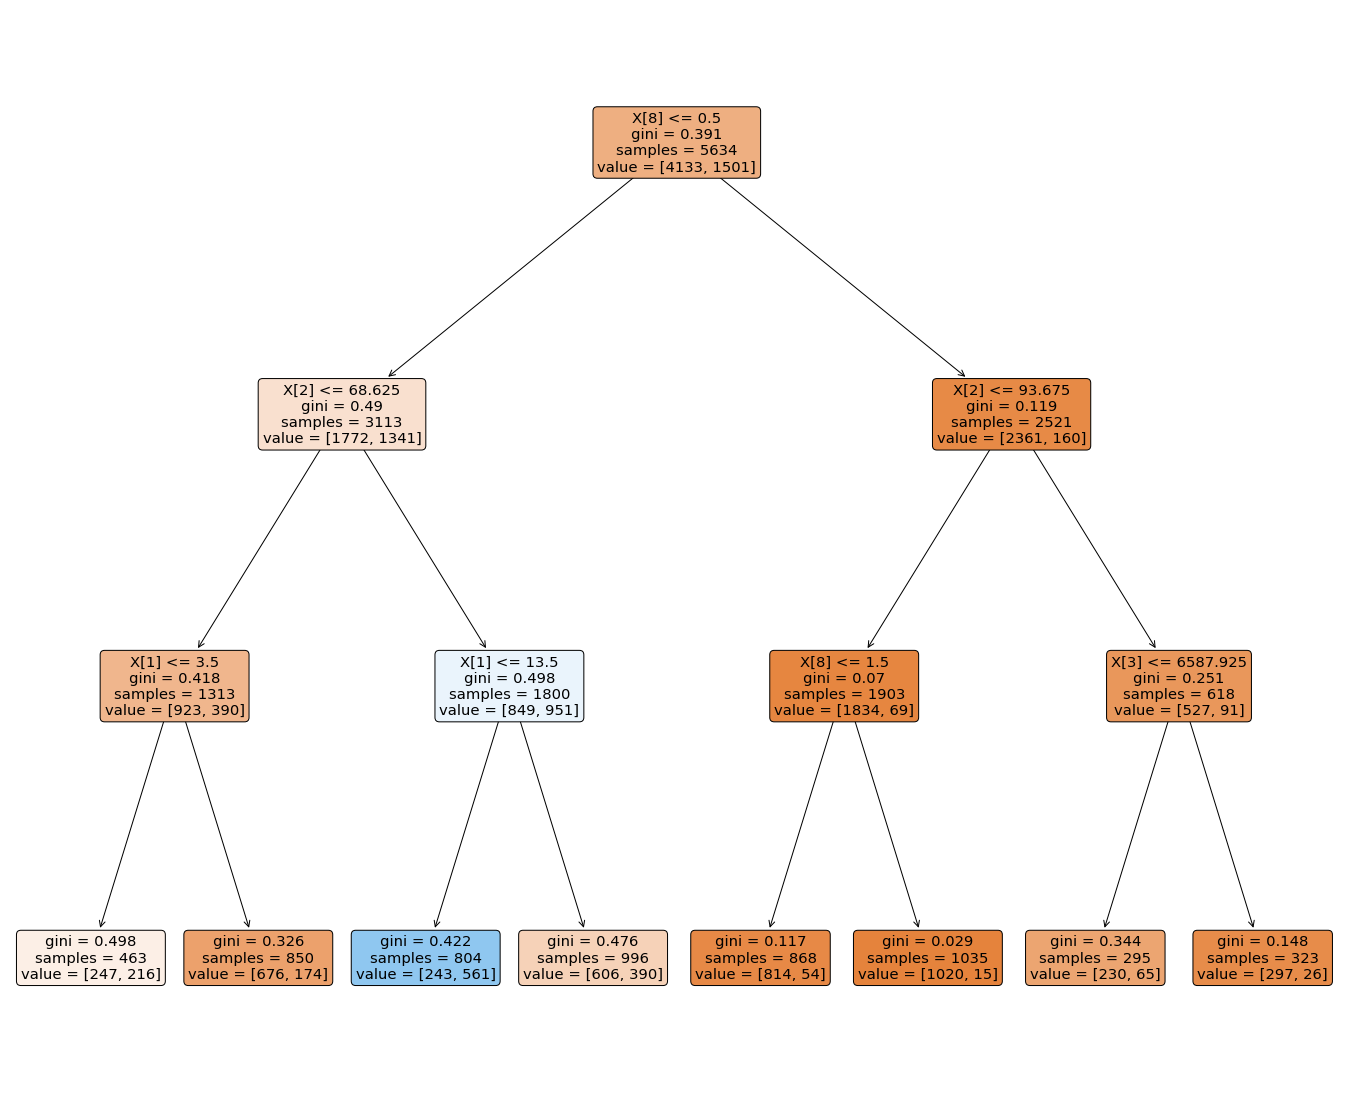

In [52]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,20))

plot_tree(model_allvars, filled = True, rounded=True)
plt.show() 

# K-fold Cross Validation

In [53]:
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [54]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [55]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [56]:
model_tree_default

DecisionTreeClassifier(random_state=0)

In [57]:
round(model_tree_default.score(x_test, y_test),4)

0.714

In [58]:
scores = cross_validate(model_tree_default, x_train, y_train, cv=10, return_estimator=True)
scores["test_score"]

array([0.73404255, 0.73404255, 0.7393617 , 0.75886525, 0.73001776,
       0.69094139, 0.72291297, 0.72291297, 0.75843694, 0.75133215])

In [59]:
print(f'{round(scores["test_score"].mean(),4)} with a standard deviation of {round(scores["test_score"].std(),4)}')

0.7343 with a standard deviation of 0.0191


# Random Forest Classifier

In [60]:
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [61]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [62]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

Confusion matrix for the train set
-----------------


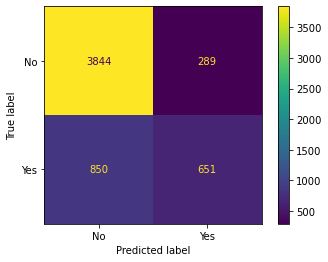

Confusion matrix for the test set
-----------------


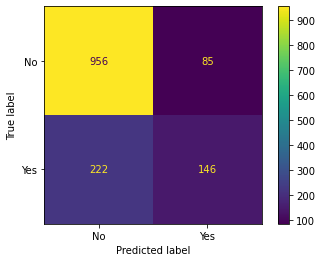

,Train,Test
Error_metric,,
Accuracy,0.797835,0.782115
Precision,0.692553,0.632035
Recall,0.433711,0.396739


In [63]:
model_randomforest = RandomForestClassifier(n_estimators = 100, max_depth=3, random_state=0)
model_randomforest.fit(x_train, y_train)
y_pred_train = model_randomforest.predict(x_train)
y_pred_test = model_randomforest.predict(x_test)
performance_randomforest = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=True)
display(performance_randomforest["performance"])

In [64]:
scores = cross_validate(model_randomforest, x_train, y_train, cv=10, return_estimator=True)
scores["test_score"]

array([0.79432624, 0.80319149, 0.79255319, 0.79787234, 0.77442274,
       0.79396092, 0.76554174, 0.79218472, 0.79751332, 0.80817052])

In [65]:
print(f'{round(scores["test_score"].mean(),4)} with a standard deviation of {round(scores["test_score"].std(),4)}')

0.792 with a standard deviation of 0.0121


# Managing Imbalance in the data

In [66]:
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]
churnData_reduced = pd.concat([x, y], axis=1)

In [67]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [68]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [69]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [70]:
churnData_reduced_yes = churnData_reduced[churnData_reduced["Churn"] == "Yes"]
churnData_reduced_no = churnData_reduced[churnData_reduced["Churn"] == "No"]

## Simple Downsampling

In [104]:
churnData_reduced_no_downsampled = churnData_reduced_no.sample(churnData_reduced_yes.shape[0])

In [105]:
churnData_reduced_balanced_ds = (pd.concat([churnData_reduced_yes, churnData_reduced_no_downsampled], axis=0)
                                  .sample(frac=1)
                                  .reset_index(drop=True)
                                )
churnData_reduced_balanced_ds

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,1,69.75,69.75,Yes
1,1,0,75.05,75.05,Yes
2,8,0,86.55,649.65,Yes
3,72,0,112.25,8041.65,No
4,1,0,20.50,20.50,Yes
...,...,...,...,...,...
3733,7,1,95.60,644.35,Yes
3734,70,0,84.60,5706.20,No
3735,60,0,94.15,5811.80,No
3736,4,0,20.95,85.50,Yes


In [106]:
churnData_reduced_balanced_ds["Churn"].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [107]:
x = churnData_reduced_balanced_ds[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData_reduced_balanced_ds["Churn"]

In [108]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [109]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [110]:
depth = 3
model_tree_maxdepth_balanced_ds = DecisionTreeClassifier(max_depth=depth)
model_tree_maxdepth_balanced_ds.fit(x_train, y_train)
y_pred_train = model_tree_maxdepth_balanced_ds.predict(x_train)
y_pred_test = model_tree_maxdepth_balanced_ds.predict(x_test)
performance_tree_maxdepth_balanced_ds = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
display(performance_tree_maxdepth_balanced_ds["performance"])

,Train,Test
Error_metric,,
Accuracy,0.728428,0.736631
Precision,0.698774,0.717762
Recall,0.801741,0.784574


## Simple Upsampling

In [78]:
churnData_reduced_yes_upsampled = churnData_reduced_yes.sample(churnData_reduced_no.shape[0], random_state=0, replace=True)

In [79]:
churnData_reduced_balanced_us = (pd.concat([churnData_reduced_no, churnData_reduced_yes_upsampled], axis=0)
                                  .sample(frac=1)
                                  .reset_index(drop=True)
                                )
churnData_reduced_balanced_us

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,16,1,39.00,679.85,Yes
1,46,0,101.10,4674.40,No
2,2,0,70.35,120.25,No
3,20,0,20.00,416.45,No
4,17,0,104.20,1743.50,Yes
...,...,...,...,...,...
10343,47,0,19.65,921.55,No
10344,39,0,48.95,1880.85,Yes
10345,5,0,19.35,126.05,Yes
10346,1,0,35.25,35.25,Yes


In [80]:
churnData_reduced_balanced_us["Churn"].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [81]:
x = churnData_reduced_balanced_us[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData_reduced_balanced_us["Churn"]

In [82]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [83]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [84]:
depth = 3
model_tree_maxdepth_balanced_us = DecisionTreeClassifier(max_depth=depth)
model_tree_maxdepth_balanced_us.fit(x_train, y_train)
y_pred_train = model_tree_maxdepth_balanced_us.predict(x_train)
y_pred_test = model_tree_maxdepth_balanced_us.predict(x_test)
performance_tree_maxdepth_balanced_us = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
display(performance_tree_maxdepth_balanced_us["performance"])

,Train,Test
Error_metric,,
Accuracy,0.735564,0.735266
Precision,0.689895,0.680334
Recall,0.858588,0.875855


## Upsampling using SMOTE

In [85]:
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [86]:
x_array = np.array(x)
y_array = np.array(y)

In [87]:
smote = SMOTE()

In [88]:
x_smote, y_smote = smote.fit_resample(x_array, y_array )

In [89]:
x_smote = pd.DataFrame(x_smote, columns=x.columns)
y_smote = pd.DataFrame(pd.DataFrame(y_smote))

In [90]:
x_smote["SeniorCitizen"][x_smote["SeniorCitizen"] < 0.5] = 0
x_smote["SeniorCitizen"][x_smote["SeniorCitizen"] > 0.5] = 1

In [91]:
x_smote["SeniorCitizen"].value_counts()

0.0    8429
1.0    1919
Name: SeniorCitizen, dtype: int64

In [92]:
x_smote

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1.000000,0.0,29.850000,29.850000
1,34.000000,0.0,56.950000,1889.500000
2,2.000000,0.0,53.850000,108.150000
3,45.000000,0.0,42.300000,1840.750000
4,2.000000,0.0,70.700000,151.650000
...,...,...,...,...
10343,16.267133,0.0,71.308530,1148.843847
10344,12.132104,0.0,99.112137,1237.815900
10345,7.891110,0.0,75.665128,609.099655
10346,13.723033,0.0,89.689213,1130.000143


In [93]:
y_smote

,0
0,No
1,No
2,Yes
3,No
4,Yes
...,...
10343,Yes
10344,Yes
10345,Yes
10346,Yes


In [94]:
transformed = my_transformations(x_smote, y_smote, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [95]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [96]:
depth = 3
model_tree_maxdepth_balanced_smote = DecisionTreeClassifier(max_depth=depth)
model_tree_maxdepth_balanced_smote.fit(x_train, y_train)
y_pred_train = model_tree_maxdepth_balanced_smote.predict(x_train)
y_pred_test = model_tree_maxdepth_balanced_smote.predict(x_test)
performance_tree_maxdepth_balanced_smote = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
display(performance_tree_maxdepth_balanced_smote["performance"])

,Train,Test
Error_metric,,
Accuracy,0.741604,0.711111
Precision,0.706405,0.681555
Recall,0.826444,0.794600
